# Math 161 - Biweekly Report 1

---

## Chosen Objectives:

1. Read data from a .csv file.
2. Fit a linear model to the data using the mean squared error function as the loss function.
3. Use gradient descent algorithim to minimize the loss function.
4. Plot the data with the optimal regression line.

## The Data:

### *Source of Data:*

Random number generation inside of an Excel spreadsheet that was converted into a .csv file.


### *Description:*

The data shows the relationship between two variables.

The first column shows the number of pages in a book.

The second column shows the number of hours it took a reader to read through the entire book.

A total of 1000 samples are included in the .csv file. Below is a display of the first 10 rows of data.

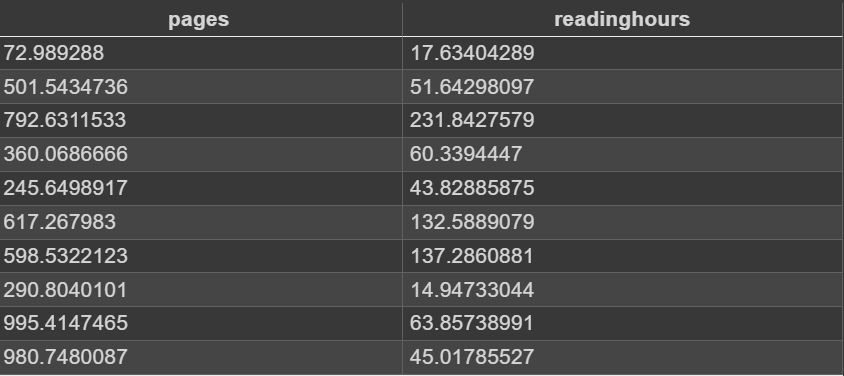







In [5]:
import pandas as pd
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

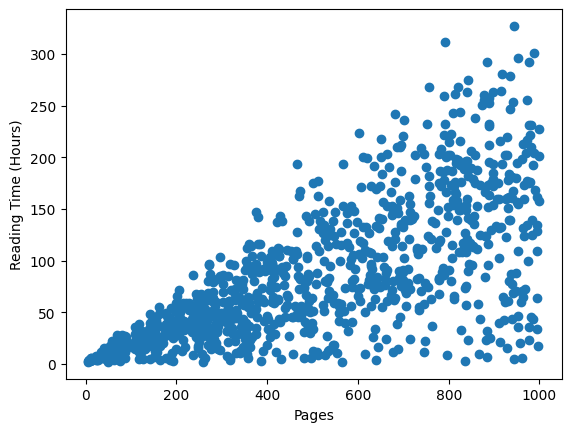

In [30]:
data = pd.read_csv('Math 161 Report 1 Data.csv')

plt.scatter(data.pages, data.readinghours)
plt.xlabel("Pages")
plt.ylabel("Reading Time (Hours)")
plt.show

## The Loss Function - Mean Squared Error

The mean squared error (MSE) loss function computes the error, or difference between the actual data point and the regression line for each point. It then squares this error value and takes the sum of all of the error values for every point in the data set. It then divides by the number of data points to arrive at the mean squared error.

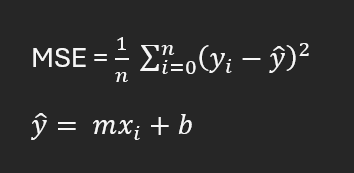

The final formula for the mean squared error is shown below:


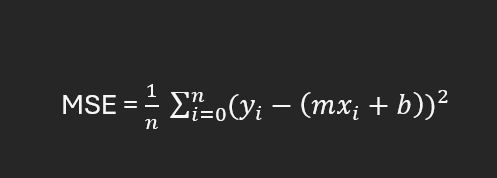



The python code for this is shown below:



In [9]:
def loss_function(m, b, points):
  total_error = 0
  for i in range(len(points)):
    x = points.iloc[i].pages
    y = points.iloc[i].readinghours
    total_error += (y - (m * x + b)) ** 2
  total_error / float(len(points))

## Minimizing the Loss Function - Gradient Descent

The loss function above is not called anywhere in this linear regression code. I included it purely for visualization.

Instead, the gradient of the loss function is used to find the values of the parameters m and b, which represent the slope and the intercept of the regression line respectively, that minimize the loss function.

The is done by computing the partial derivative of the loss function with respect to m and the partial derivative with respect to b. The gives us a vector known as the gradient that points in the direction of steepest ascent in the loss function. The handwritten calculation of the gradient vector is shown below:

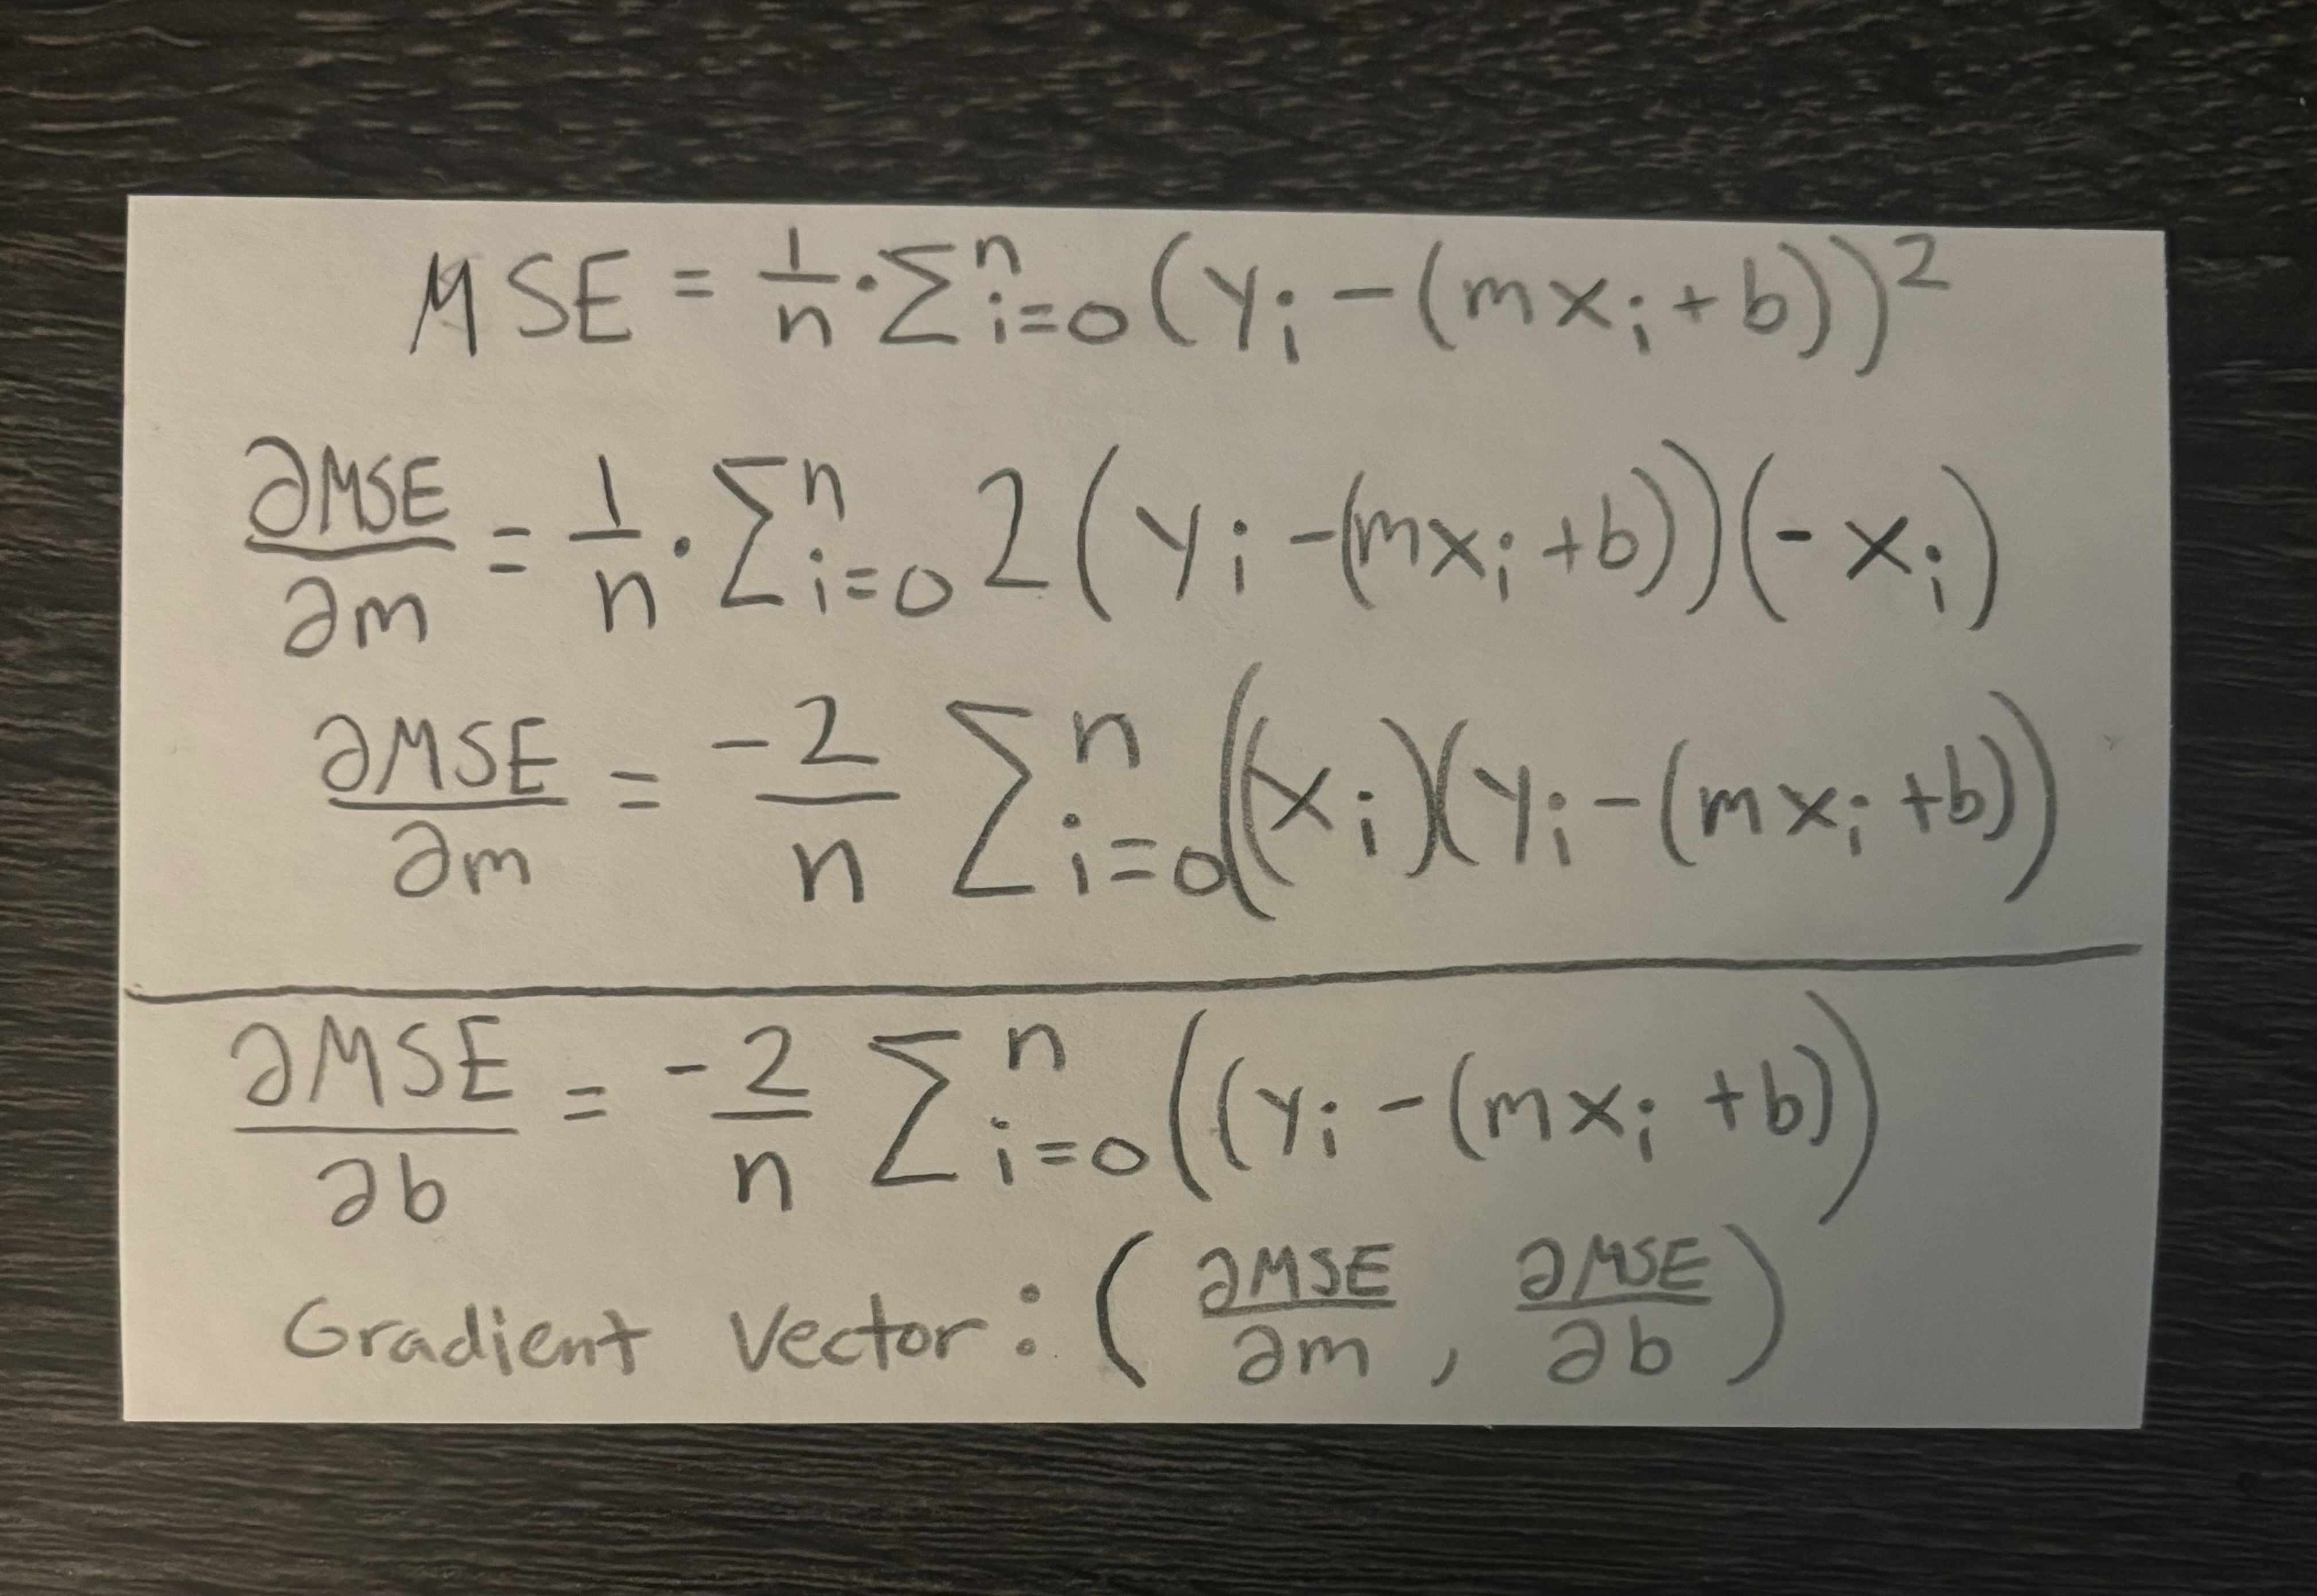

By making this gradient vector negative, we can know the direction of steepest decent.

The python implementation of this is shown below:

In [3]:
def gradient_decent(m_now, b_now, points, L):
  m_gradient = 0
  b_gradient = 0

  n = len(points)

  for i in range(n):
    x = points.iloc[i].pages
    y = points.iloc[i].readinghours

    m_gradient += -(2/n * x * (y - (m_now * x + b_now)))
    b_gradient += -(2/n * (y - (m_now * x + b_now)))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

## Hyperparameters

Here, I initialize the values of m and b along with the learning rate, L, and the number of interations that the training dataset passes through the gradient decent function per cycle known as the "epochs."

In [32]:
m = 0
b = 0
L = 0.0001
epochs = 1000

## Plotting the Data and Regression Line

The gradient descent function is called in the following for loop that iterates by the number of epochs that are defined above.

The values of m and b are updated each time.

After all interations of the for loop, the final values of m and b are used to plot a regession line on top of the data that is plotted below:

0.15838699949995 0.0021700033503539605


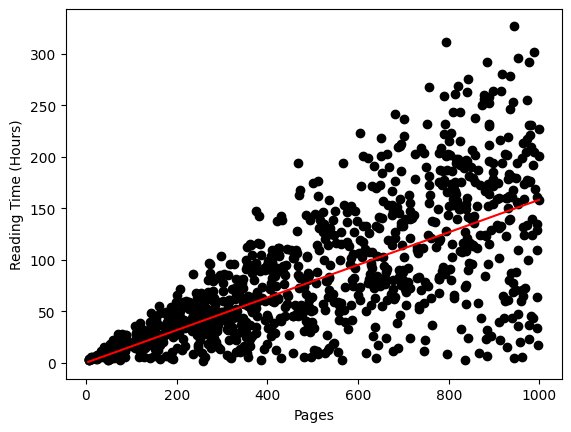

In [33]:
for i in range(epochs):
    m, b = gradient_decent(m, b, data, L)

print(m, b)

plt.scatter(data.pages, data.readinghours, color="black")
plt.plot(list(range(5, 1000)), [m * x + b for x in range(5, 1000)], color="red")
plt.xlabel("Pages")
plt.ylabel("Reading Time (Hours)")
plt.show()